# Effect Size and Power

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
    # statsmodels also has FTestPower and FTestAnovaPower classes!
import seaborn as sns

%matplotlib inline

## Agenda

SWBAT:

- Visualize and explain effect size in Python
- Conduct power analysis in Python
- Explain what power and power analysis are in context  
- Explain type I and type II error in specific context

## Part 1. Effect Size

Effect size is used to quantify the *size* of the difference between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and are applicable to a multitude of study domains.

We know already that $p$-values tell us (together with some $\alpha$-threshold) *whether* differences between groups are significant; the idea now is to have a measure of *how* significant differences are.

### Why do we need $p$-values *and* effect size?

[Here](https://www.physport.org/recommendations/Entry.cfm?ID=93385) is a helpful resource. The basic idea is this:

We can shrink $p$-values rather artificially by increasing our sample size, no matter how small the effect size between two groups. So, with a large enough sample size, we can have as small a $p$-value as we like––but it won't be an interesting result if the effect size is small.

The opposite difficulty is possible as well: Our $p$-value can be quite large if our sample size is small enough. And that's true even if the effect size is large.

### Example
Compare effect size of gender in height.

In [2]:
# Seed the random number generator so we all get the same results
np.random.seed(10)

# Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = stats.norm(female_mean, female_sd)


In [3]:
male_height.rvs()

188.2532160817973

In [4]:
def evaluate_PDF(rv, x=4):
    """
    Input: a random variable object, number of standard deviations
    Output: x and y values for the normal distribution
    """
    
    # Identify the mean and standard deviation of random variable.
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the
    # specified interval (4 sd by default) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the normal distribution i.e. the probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

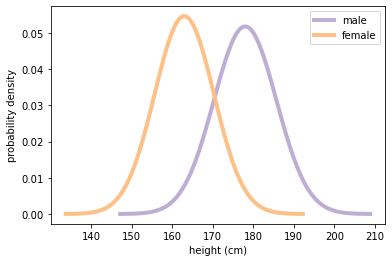

In [5]:
# Male height
xs, ys = evaluate_PDF(male_height)
fig, ax = plt.subplots()
ax.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(female_height)
ax.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

ax.set_xlabel('height (cm)')
ax.set_ylabel('probability density')
plt.legend();

### Cohen's $d$, standardized metrics for effect size
Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's $d$ is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = difference of means / pooled standard deviation;

$d = \frac{\mu_1 - \mu_2}{\sigma_{pooled}}$

In [6]:
def Cohen_d(group1, group2):

    """
    Computes Cohen's d.
    """
    
    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)

    # Calculate the pooled variance
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2 - 2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [7]:
np.random.seed(10)
# x1 = np.random.normal(male_mean, male_sd, 1000)
# x2 = np.random.normal(female_mean, female_sd, 1000)

female_sample = female_height.rvs(1000)
male_sample = male_height.rvs(1000)

effect = Cohen_d(male_sample, female_sample)
print(effect)

2.066588116850072


#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/cohend/)

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

In [ ]:
def plot_pdfs(cohen_d=2):
    """
    Plot PDFs for distributions that differ by some number of stds.
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    fig, ax = plt.subplots()
    ax.fill_between(xs, ys, label='Female', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    ax.fill_between(xs, ys, label='Male', color='#376cb0', alpha=0.7)
    plt.legend()

In [ ]:
plot_pdfs()

## Part 2. Error
When conducting hypothesis testing, we __choose__ a value for alpha, which represents the risk of falsely rejecting the null hypothesis. If, as is somewhat conventional, we set the alpha at 0.05, then we are saying that "for 5% of the time, we are willing to reject the null hypothesis when it is in fact true". How, then, do we categorize different types of error associated with conducting the experiments?

#### Type I error
Type I error is usually represented as $\alpha$, which is the probability of rejecting the null hypothesis when it is in fact true. (false positive)

#### Type II Error
Type II error is represented as $\beta$; it is the probability of failing to reject the null hypothesis when it is in fact false. (false megative)

## Part 3. Power
How does statistical power relate to two types of error? Power is defined as the __probability of not making a Type
II error__ (i.e., probability of correctly rejecting H0 when it is in fact false).

Relevance of Power?
- Low Statistical Power: Large risk of committing Type II errors, i.e. a false negative.
- High Statistical Power: Small risk of committing Type II errors.

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

How does sample size affect power?

These four quantities––$\alpha$, sample size, effect size, and power––have important interrelationships for hypothesis testing that this notebook will illustrate.

Let's recall what each of these is and why each is important to experimental design:

- $\alpha$ is our false-positive rate, i.e the rate at which our tests will lead us to reject the null hypothesis when in fact it is true. This is the same $\alpha$ that determines the size of our test statistic (which in turn affects the size of our confidence intervals). This is semi-standardly set to 0.05, but in practice an appropriate value will depend on the nature of the tests. How costly would a false positive be?

- Sample Size, often indicated with $n$, is of course just how many points we have in our sample. Note that we may or may not have much control over this! One common scenario is to calculate how large your sample size needs to be in order to have a test that has a given degree of power.

- Effect Size, commonly measured by Cohen's $d$ statistic, is a parameter over which one has effectively **no control**. This is a measure of *how different* two samples are, and so this is of course a reflection of underlying reality, as opposed to a result of experimental choice.

- Power is $1 - \beta$, where $\beta$ is our false-negative rate. Since $\beta$ tells us the rate at which our tests will lead us *to fail* to reject the null hypothesis when in fact it is false, the power of a test thus tells us the rate at which our tests lead us to reject the null hypothesis when it is false. Of course, the null hypothesis is false when we have some genuine difference between two samples, and so power is a measure of the ability of a test to pick up on those differences when they are present.

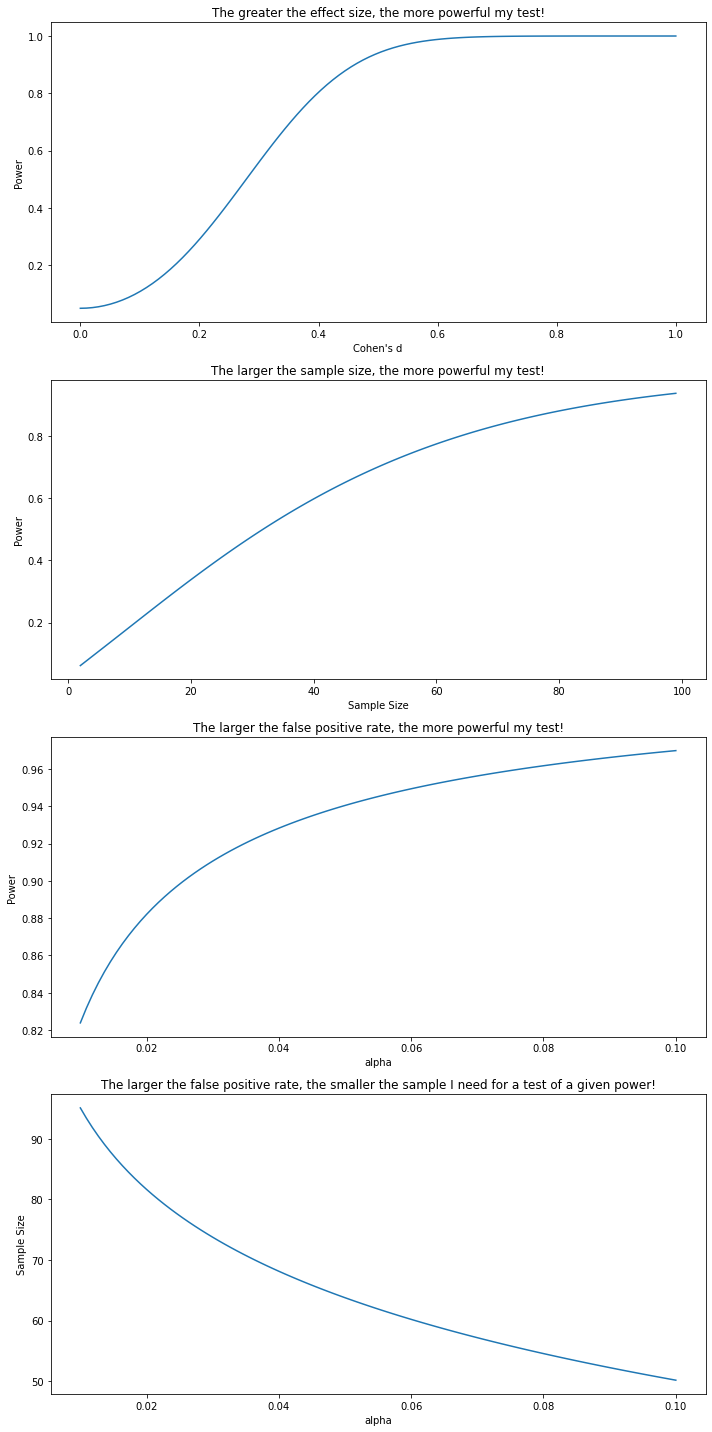

In [8]:
alpha_default = 0.05
n_default = 100
d_default = 0.5
pow_default = 0.8

test = TTestIndPower()

## Power as a function of effect size
ds = np.linspace(0, 1, 100)
power_per_d = []
for d in ds:
    power_per_d.append(test.solve_power(alpha=alpha_default,
                                        nobs1=n_default, effect_size=d))

## Power as a function of sample size
ns = np.arange(1, 100, 1)
power_per_n = []
for n in ns:
    power_per_n.append(test.solve_power(alpha=alpha_default,
                                        nobs1=n, effect_size=d_default))

## Power as a function of alpha
alphas = np.linspace(0.01, 0.1, 100)
power_per_alpha = []
for alpha in alphas:
    power_per_alpha.append(test.solve_power(alpha=alpha,
                                            nobs1=n_default, effect_size=d_default))


## Sample size as a function of alpha
n_per_alpha = []
for alpha in alphas:
    n_per_alpha.append(test.solve_power(alpha=alpha,
                                        effect_size=d_default, power=pow_default))

## Plotting
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
ax[0].plot(ds, power_per_d)
ax[0].set_xlabel('Cohen\'s d')
ax[0].set_ylabel('Power')
ax[0].set_title('The greater the effect size, the more powerful my test!')
ax[1].plot(ns, power_per_n)
ax[1].set_xlabel('Sample Size')
ax[1].set_ylabel('Power')
ax[1].set_title('The larger the sample size, the more powerful my test!')
ax[2].plot(alphas, power_per_alpha)
ax[2].set_xlabel('alpha')
ax[2].set_ylabel('Power')
ax[2].set_title('The larger the false positive rate, the more powerful my test!')
ax[3].plot(alphas, n_per_alpha)
ax[3].set_xlabel('alpha')
ax[3].set_ylabel('Sample Size')
ax[3].set_title('The larger the false positive rate, the smaller the sample\
 I need for a test of a given power!')
plt.tight_layout();

### What is the formula for calculating power?

Power is usually complex to calculate, but there are sometimes tables available.

Examples of power tables:
- [full power table](http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf)

### Plotting Power Curves

In [ ]:
test.plot_power(dep_var='nobs',
                         nobs=np.arange(10, 100),
                         effect_size=[0.2, 0.5, 0.8, 1.3]);

## Part 4. Case Study 
Suppose you are launching a pilot study with Instagram and you want to examine whether the new feature––making the heart when you "like" someone's photo red instead of white––that was developed by the front-end engineer attracted more likes given that other variables are being held constant. You have collected two datasets. 

In [ ]:
experiment = pd.read_csv('data/likes_experiment.csv', index_col=0)
control = pd.read_csv('data/likes_control.csv', index_col=0)

### Look at the data

In [ ]:
experiment.head()

In [ ]:
control.head()

In [ ]:
experiment.mean()

In [ ]:
control.mean()

Calculate effect size:

In [ ]:
effect_size = Cohen_d(experiment['Likes_Given_Exp'], control['Likes_Given_Con'])

In [ ]:
effect_size

#### Solve for sample size

We can use `power_analysis.solve_power` from `statsmodels` to find the sample size you need.

[documentation here](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [ ]:
# We want to know how many observations we need in order to
# attain a power of 0.8, given an alpha of 0.05
 
#effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, 
                                         power=power, 
                                         alpha=alpha)
sample_size

In [ ]:
print(experiment.shape)
print(control.shape)

Luckily, we do have enough observations to conduct this experiment!

In [ ]:
# conducting a T Test
stats.ttest_ind(experiment['Likes_Given_Exp'], control['Likes_Given_Con'],
               equal_var=False)

In [ ]:
#warnings.filterwarnings("ignore")
sns.kdeplot(experiment['Likes_Given_Exp'], shade=True)
sns.kdeplot(control['Likes_Given_Con'], shade=True);

### A Word of Caution

This looks like a highly significant result! The low p-value tells us that the difference in sample statistics is likely not the result of chance. But we can infer that the new Instagram feature is relevant to the difference only if we can rule out other factors. Good experimental design would require that the control and experimental groups be constructed randomly. Let's check the "Average Likes Given" column to make sure we're on safe ground!

In [ ]:
effect_size_avg = Cohen_d(experiment['Avg_Likes_Given_Exp'], control['Avg_Likes_Given_Con'])
effect_size_avg

In [ ]:
stats.ttest_ind(experiment['Avg_Likes_Given_Exp'], control['Avg_Likes_Given_Con'],
               equal_var=False)

Indeed, this difference is not so significant. So we have good reason to think that there is a very significant difference between the two groups that cannot be explained by a difference in average likes between the two groups.

## Part 5. Limitations of Cohen's $d$

Remember the story we told back in Part 1? It went like this: For a given effect size, we can shrink our $p$-value by increasing our sample size or inflate our $p$-value by decreasing our sample size. But the trouble with this story is that it assumes that effect size is independent of sample size. This, at least if we are measuring effect size in terms of Cohen's $d$, is false, since that metric depends on the standard deviation, which, in turn, depends on sample size.

Of course, if we had access to the population parameters, then we could calculate Cohen's $d$ on those and this worry would effectively vanish. But in practice we do not have access to these, and so we are in the familiar position of estimating these based on samples.

[Here](https://garstats.wordpress.com/2018/04/04/dbias/) is a nice resource on this problem.

The basic upshot is this: Cohen's $d$, when calculated on samples, tends to **overestimate** the true effect size of a difference between populations (because population standard deviations are often larger than sample standard deviations), **especially** for small sample sizes. So: If your sample sizes are relatively small, take Cohen's $d$ with a grain of salt––or use some more robust metric of effect size.

For more on this, see [here](https://www.statisticssolutions.com/statistical-analyses-effect-size/) and [here](https://garstats.wordpress.com/2016/05/02/robust-effect-sizes-for-2-independent-groups/).

## Appendix: Free Online Power Calculator

Online Power Calculator: https://clincalc.com/Stats/Power.aspx